<a href="https://colab.research.google.com/github/kabta/Prediction-of-Bank-deposit-via-bank-marketing/blob/main/Prediction_of_Bank_Deposit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing necessary libraries**




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

**csv to panda dataframe**

In [ ]:
bank_df = pd.read_csv("/content/bank-additional-full.csv", sep=';')
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


**Visualizing data**

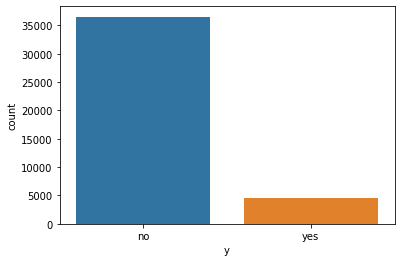

In [ ]:
sns.countplot(x='y', data=bank_df)


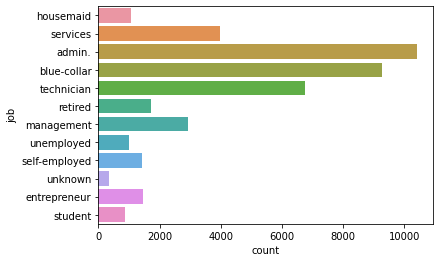

In [ ]:
sns.countplot(y='job', data=bank_df)


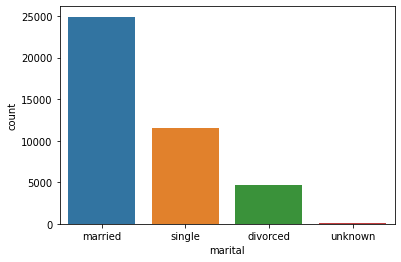

In [ ]:
sns.countplot(x='marital', data=bank_df)


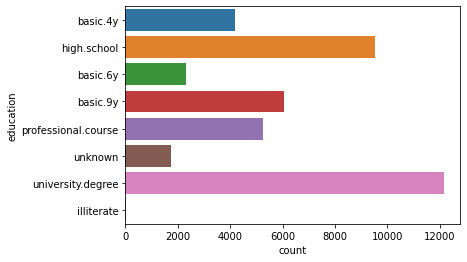

In [ ]:
sns.countplot(y='education', data=bank_df)


In [ ]:
print('Number of samples:',len(bank_df))

Number of samples: 41188


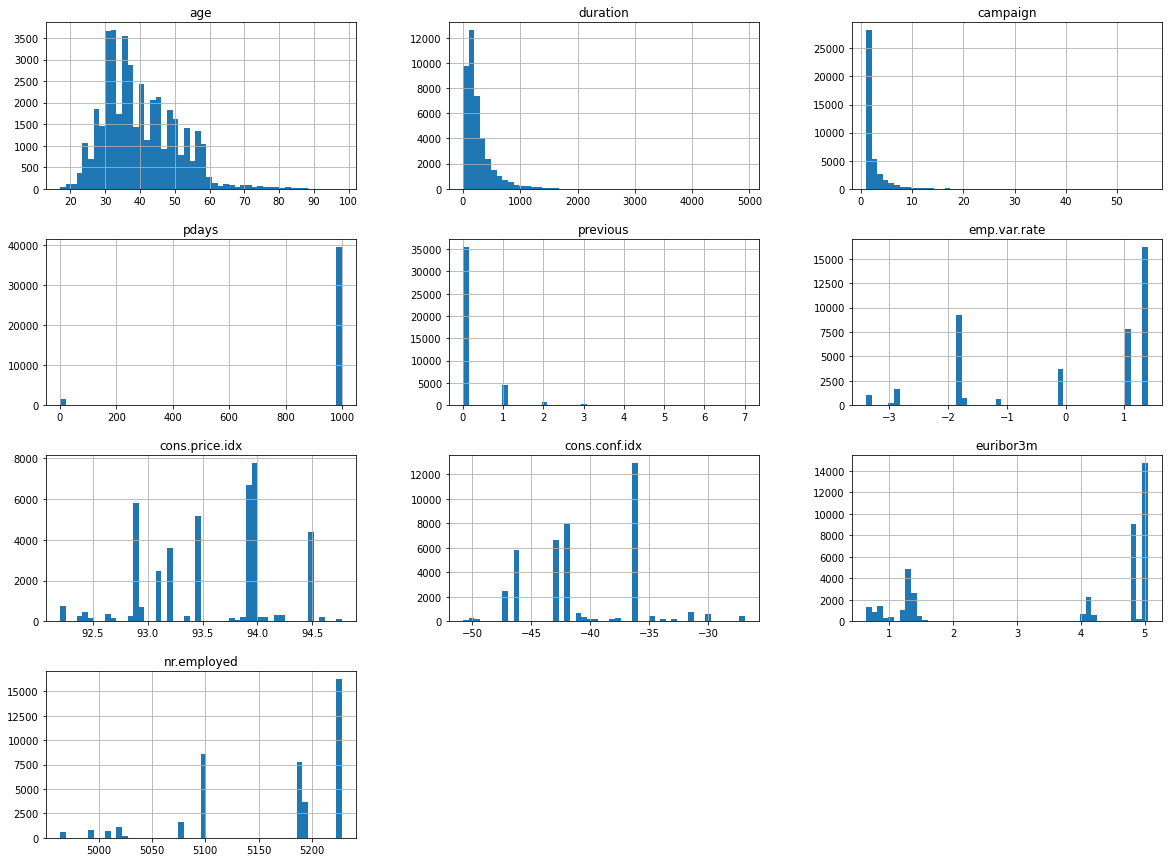

In [ ]:
#histogram for continous attributes
bank_df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no



**Checking for any null data in the data set**

In [ ]:
pd.isnull(bank_df).sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

checking data types of each feature

In [ ]:
bank_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The three values (basic.4y, basic.6y, basic.9y) under education can be combined and set into a single value'Basic':

In [ ]:
bank_df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [ ]:
bank_df['education']=np.where(bank_df['education'] =='basic.9y', 'Basic', bank_df['education'])
bank_df['education']=np.where(bank_df['education'] =='basic.6y', 'Basic', bank_df['education'])
bank_df['education']=np.where(bank_df['education'] =='basic.4y', 'Basic', bank_df['education'])

In [ ]:
bank_df['education'].unique()

array(['Basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

In [ ]:
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,Basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,Basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
bank_df.shape

(41188, 21)

One hot encoding on categorical features, 'job', 'marital', 
       'education', 'default',
       'housing', 'loan', 'month',
       'day_of_week', 'poutcome'


In [ ]:
#converting each categoraicals coloumns to numerical values using one hot encoding so that it can be used for classfication in future
bank_catcols = ['job', 'marital', 
       'education', 'default',
       'housing', 'loan', 'month',
       'day_of_week', 'poutcome']
data_bank= bank_df[bank_catcols]
bank_dummies=pd.get_dummies(data_bank)
bank_newcat = pd.concat([bank_dummies, bank_df], axis = 1)
bank_newcat.head()


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,0,0,1,0,0,0,0,0,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,0,0,0,0,0,0,0,1,0,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,0,0,0,0,0,0,0,1,0,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,1,0,0,0,0,0,0,0,0,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,0,0,0,0,0,0,0,1,0,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


excluding contact, duration



In [ ]:
bank_newcat = bank_newcat.drop(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome', 'duration'],axis=1)
bank_newcat.shape

(41188, 59)

In [ ]:
bank_newcat.columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'age', 'campaign', 'pdays', 'previous',
   

In [ ]:
bank_newcat

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,0,0,1,0,0,0,0,0,0,...,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,0,0,0,0,0,0,0,1,0,0,...,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,0,0,0,0,0,0,0,1,0,0,...,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,1,0,0,0,0,0,0,0,0,0,...,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,0,0,0,0,0,0,0,1,0,0,...,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,0,1,0,0,0,0,...,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,0,1,0,0,0,0,0,0,0,0,...,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,0,0,0,0,0,1,0,0,0,0,...,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,no
41186,0,0,0,0,0,0,0,0,0,1,...,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes


**label encoding of category 'y'**

In [ ]:
bank_newcat['y'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
bank_newcat['y'] = bank_newcat['y'].apply(lambda x: 0 if x =='no' else 1)

In [ ]:
bank_newcat['y'].unique()

array([0, 1])

In [ ]:
X = bank_newcat.iloc[:,0:58]
X[0:5]

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_success,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,0,0,1,0,0,0,0,0,0,...,0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,0,0,0,0,0,0,0,1,0,0,...,0,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,0,0,0,0,0,0,0,1,0,0,...,0,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,1,0,0,0,0,0,0,0,0,0,...,0,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,0,0,0,0,0,0,0,1,0,0,...,0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0


**Standarization using sklearn StandardScalar:**

In [ ]:
from sklearn.preprocessing import StandardScaler
import pickle

scaler  = StandardScaler()
scaler.fit(X)
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))
# load it back
scaler = pickle.load(open(scalerfile, 'rb'))
# transform our data matrices
x_scaled = scaler.transform(X)


In [ ]:
# Print mean and standard deviation
print("Mean:", round(x_scaled[:,0].mean()))
print("Standard deviation:", x_scaled[:,0].std())

Mean: 0
Standard deviation: 1.0


In [ ]:
X.shape

(41188, 58)

In [ ]:
y = bank_newcat.iloc[:,58]
y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

**Spliting into Train and Test data**

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_scaled, y, test_size=0.3) #70/30 split

In [ ]:
x_train.shape, y_train.shape


((28831, 58), (28831,))

In [ ]:
x_test.shape, y_test.shape


((12357, 58), (12357,))

In [ ]:
print(y_train.unique())

[0 1]


In [ ]:
x_test.shape

(12357, 58)

**Designing a Neural Network**

In [ ]:
from keras import models
from keras import layers
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
# define the keras model
model = models.Sequential()
model.add(Dense(16, input_shape=(58,), activation='relu', name='input'))
model.add(Dense(32, activation='relu', name= 'hidden_1'))
model.add(Dense(64,  activation='relu', name= 'hidden_2'))
model.add(Dense(128, activation='relu', name= 'hidden_3'))


model.add(Dense(1, input_dim=16, activation='sigmoid', name= 'output'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Set callback functions to early stop training and save the best model so far
checkpoint = [ModelCheckpoint(filepath="seqmodels.hdf5")]

**Model summary**

In [ ]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 16)                944       
                                                                 
 hidden_1 (Dense)            (None, 32)                544       
                                                                 
 hidden_2 (Dense)            (None, 64)                2112      
                                                                 
 hidden_3 (Dense)            (None, 128)               8320      
                                                                 
 output (Dense)              (None, 1)                 129       
                                                                 
Total params: 12,049
Trainable params: 12,049
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
checkpoint = [ModelCheckpoint(filepath="model.hdf5")]


**Training model**

In [ ]:
training_results = model.fit(x_train, y_train, verbose=1, 
                             batch_size=100, epochs=10 , 
                             callbacks=checkpoint,
                             validation_data= (x_test,y_test))




Epoch 1/10
289/289 [==============================] - 1s 4ms/step - loss: 0.2671 - accuracy: 0.9026 - val_loss: 0.2830 - val_accuracy: 0.8935
Epoch 2/10
289/289 [==============================] - 1s 3ms/step - loss: 0.2667 - accuracy: 0.9041 - val_loss: 0.2793 - val_accuracy: 0.8985
Epoch 3/10
289/289 [==============================] - 1s 3ms/step - loss: 0.2646 - accuracy: 0.9036 - val_loss: 0.2811 - val_accuracy: 0.8975
Epoch 4/10
289/289 [==============================] - 1s 3ms/step - loss: 0.2630 - accuracy: 0.9038 - val_loss: 0.2806 - val_accuracy: 0.8972
Epoch 5/10
289/289 [==============================] - 1s 3ms/step - loss: 0.2614 - accuracy: 0.9048 - val_loss: 0.2848 - val_accuracy: 0.8949
Epoch 6/10
289/289 [==============================] - 1s 3ms/step - loss: 0.2605 - accuracy: 0.9048 - val_loss: 0.2830 - val_accuracy: 0.8957
Epoch 7/10
289/289 [==============================] - 1s 3ms/step - loss: 0.2594 - accuracy: 0.9058 - val_loss: 0.2840 - val_accuracy: 0.8962
Epoch 

In [ ]:
predicted_test = model.predict(x_test)


387/387 [==============================] - 1s 1ms/step


In [ ]:
predicted_test

array([[0.03749133],
       [0.03585124],
       [0.01056123],
       ...,
       [0.06519512],
       [0.01649217],
       [0.03558332]], dtype=float32)

In [ ]:
predicted_test[1]


array([0.03585124], dtype=float32)

visualizing training history

In [ ]:
# Get training and test loss histories
training_loss = training_results.history["loss"]
test_loss = training_results.history["val_loss"]
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

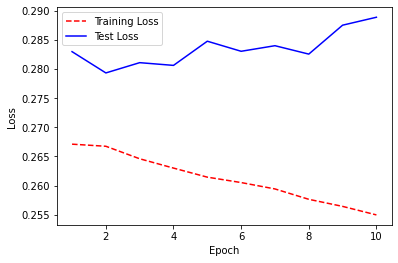

In [ ]:
import matplotlib.pyplot as plt
# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [ ]:
# Get training and test accuracy histories
training_accuracy = training_results.history["accuracy"]
test_accuracy = training_results.history["val_accuracy"]


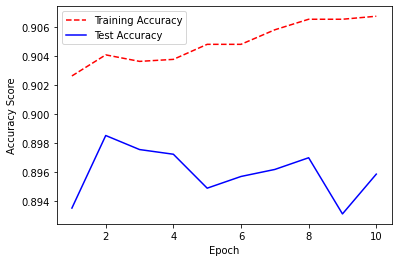

In [ ]:
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
# Visualize accuracy history
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

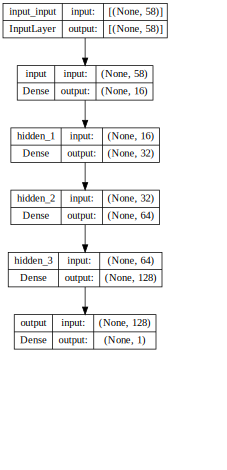

In [ ]:
# Visualize network architecture
SVG(model_to_dot(model, show_shapes=True).create(prog="dot", format="svg"))